# **Importing Libararies**

In [1]:
import pandas as pd              #python package for data analysis
import numpy as np               #python package for arrays handling
import seaborn as sns            #python package for data visualization
import matplotlib.pyplot as plt  #python package for data visualization

# **Reading the Data**

In [2]:
loan_df_train=pd.read_csv('LoanDatasets.csv')         #reading the training data
loan_df_test=pd.read_csv('LoanDataset_test.csv')      #reading the test data

# **Features in the Datasets**

In [3]:
loan_df_train.columns       #features in the training dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
loan_df_test.columns         #features in the testing dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# **Checking Missing Values**

In [5]:
#missing values in the training dataset
loan_df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        33
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           23
Loan_Amount_Term     14
Credit_History       51
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#missing values in the test dataset
loan_df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# **Filling Missing Values**

### **Filling Values in the Training Dataset**

In [7]:
loan_df_train['Gender'].fillna(loan_df_train['Gender'].mode()[0],inplace=True)

In [8]:
loan_df_train['Married'].fillna(loan_df_train['Married'].mode()[0],inplace=True)

In [9]:
loan_df_train['Dependents'].fillna(loan_df_train['Dependents'].mode()[0],inplace=True)

In [10]:
loan_df_train['Self_Employed'].fillna(loan_df_train['Self_Employed'].mode()[0],inplace=True)

In [11]:
loan_df_train['CoapplicantIncome'].fillna(loan_df_train['CoapplicantIncome'].mean(),inplace=True)

In [12]:
loan_df_train['LoanAmount'].fillna(loan_df_train['LoanAmount'].mean(),inplace=True)

In [13]:
loan_df_train['Loan_Amount_Term'].fillna(loan_df_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [14]:
loan_df_train['Credit_History'].fillna(loan_df_train['Credit_History'].mode()[0],inplace=True)

### **Filling Missing Values in the Testing Dataset**

In [15]:
loan_df_test['Gender'].fillna(loan_df_test['Gender'].mode()[0],inplace=True)

In [16]:
loan_df_test['Dependents'].fillna(loan_df_test['Dependents'].mode()[0],inplace=True)

In [17]:
loan_df_test['Self_Employed'].fillna(loan_df_test['Self_Employed'].mode()[0],inplace=True)

In [18]:
loan_df_test['Credit_History'].fillna(loan_df_test['Credit_History'].mode()[0],inplace=True)

In [19]:
loan_df_test['LoanAmount'].fillna(loan_df_test['LoanAmount'].mean(),inplace=True)

In [20]:
loan_df_test['Loan_Amount_Term'].fillna(loan_df_test['Loan_Amount_Term'].mode()[0],inplace=True)

In [21]:
#Replacing Loan_Staus(Y,N) with 1,0 respectively
loan_df_train['Loan_Status'].replace('N', 0,inplace=True)
loan_df_train['Loan_Status'].replace('Y', 1,inplace=True)

# **Correlation Among Features of the Training Dataset**

C:\Users\Awais Nayyar\AppData\Local\Temp\ipykernel_14496\3972187214.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = loan_df_train.corr()


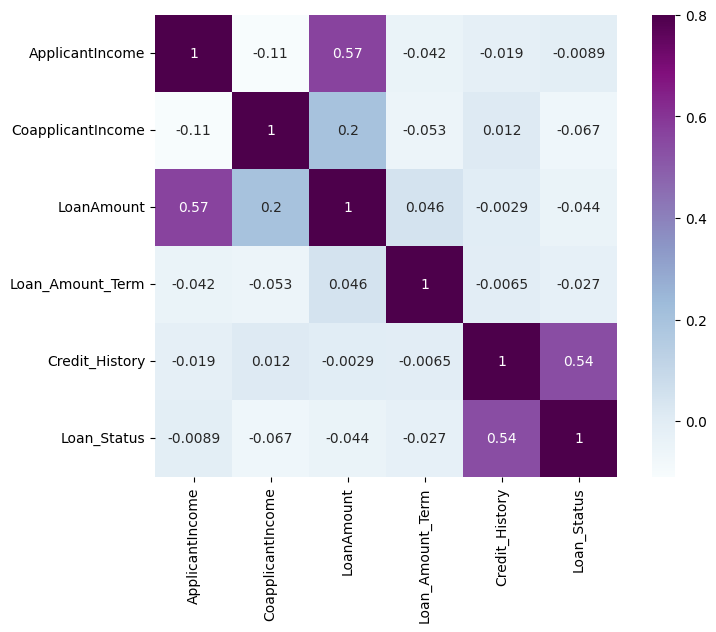

In [22]:
matrix = loan_df_train.corr()
plt.figure(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)
plt.show()

We see that the most correlate variables are (ApplicantIncome — LoanAmount)(0.57) and (Credit_History — Loan_Status)(0.56).

### **Loan_Status vs Gender**

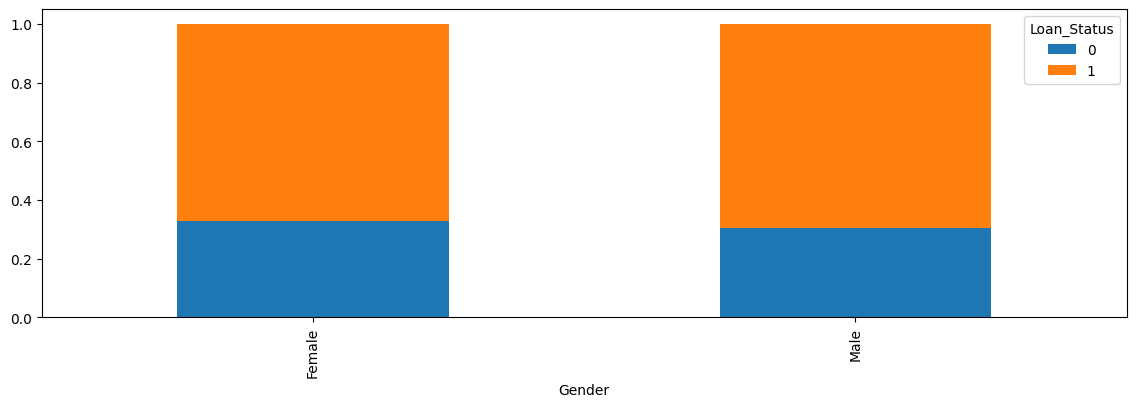

In [23]:
Gender=pd.crosstab(loan_df_train['Gender'],loan_df_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(14,4))
plt.show()

In [24]:
#we can see that gender does not effect the possibility of awarding bank loans too much.

### **Loan_Status vs Marital Status**

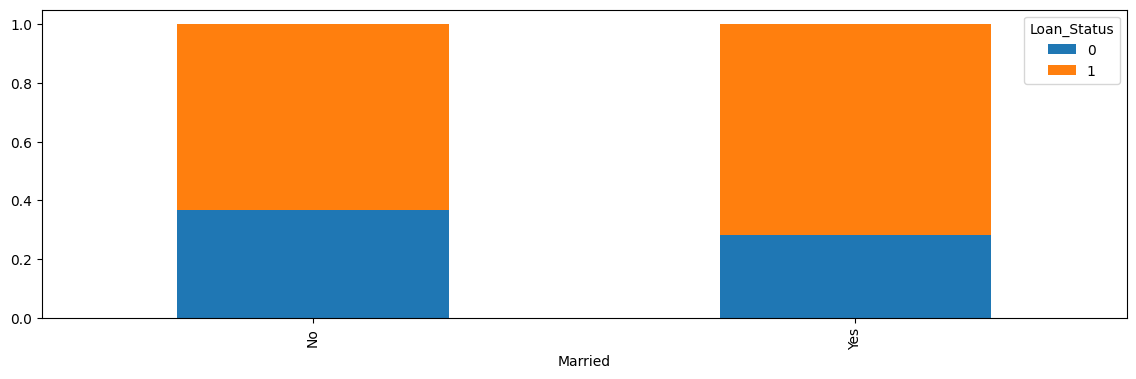

In [25]:
Married=pd.crosstab(loan_df_train['Married'],loan_df_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(14,4))
plt.show()

In [26]:
#we can see that Marital Status does not effect the possibility of awarding bank loan.

### **Loan_Status vs Dependents**

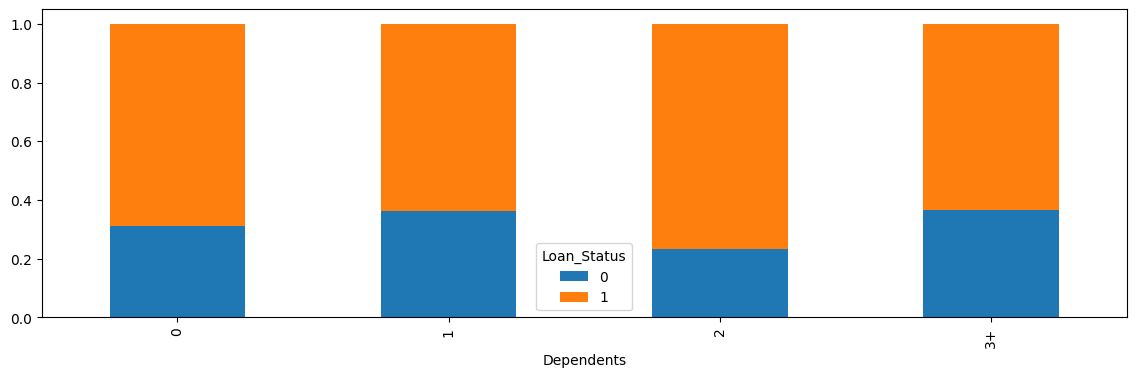

In [27]:
Dependents=pd.crosstab(loan_df_train['Dependents'],loan_df_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(14,4))
plt.show()

In [28]:
#we can see that there not perfect influence of Dependents on the possibility of awarding bank loan.

### **Loan_Status vs Education**

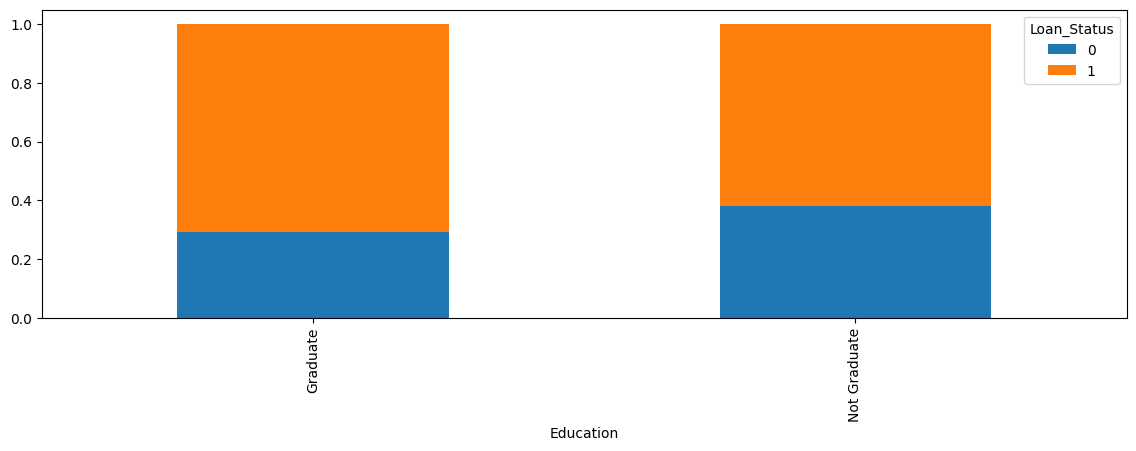

In [29]:
Education=pd.crosstab(loan_df_train['Education'],loan_df_train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(14,4))
plt.show()

In [30]:
#he possibility of awarding bank loan has slight trend toward gradguated people.

### **Loan_Status vs Self_Employed**

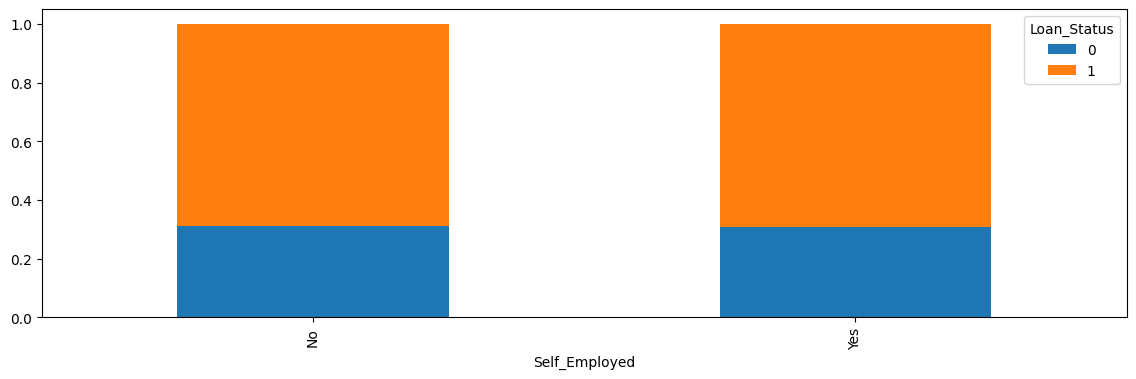

In [31]:
Self_Employed=pd.crosstab(loan_df_train['Self_Employed'],loan_df_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(14,4))
plt.show()

In [32]:
#the possibility of awarding a loan does not depend on employment status.

### **Loan_Status vs Credit History**

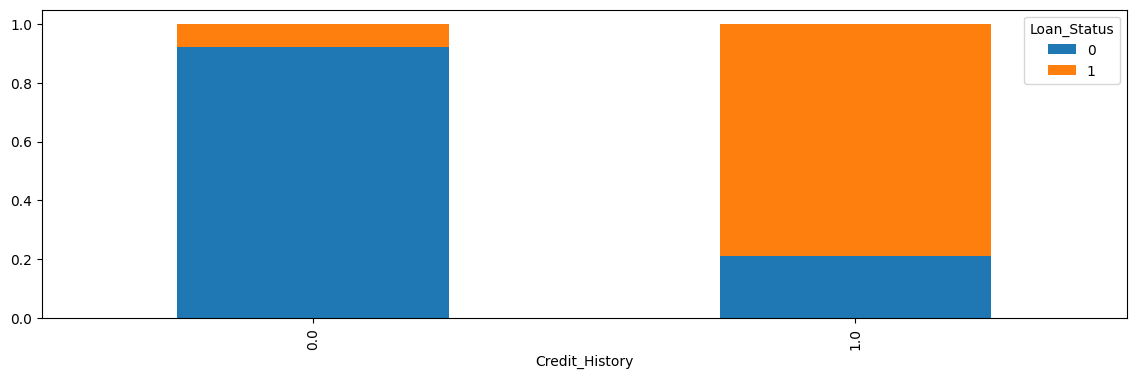

In [33]:
Credit_History=pd.crosstab(loan_df_train['Credit_History'],loan_df_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(14,4))
plt.show()

In [34]:
#Here we can see that loan is awarded to only those people who cleared past debts.

### **Loan_Status vs Property_Area**

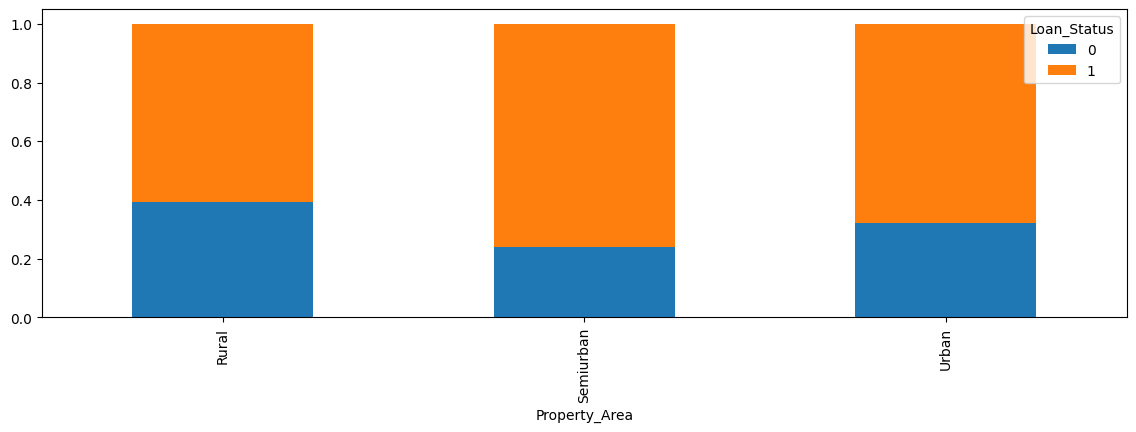

In [35]:
Property_Area=pd.crosstab(loan_df_train['Property_Area'],loan_df_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(14,4))
plt.show()

In [36]:
#Similarly, awarding of a loan does not depend on the property area.

### **Distribution of Loan_Status**

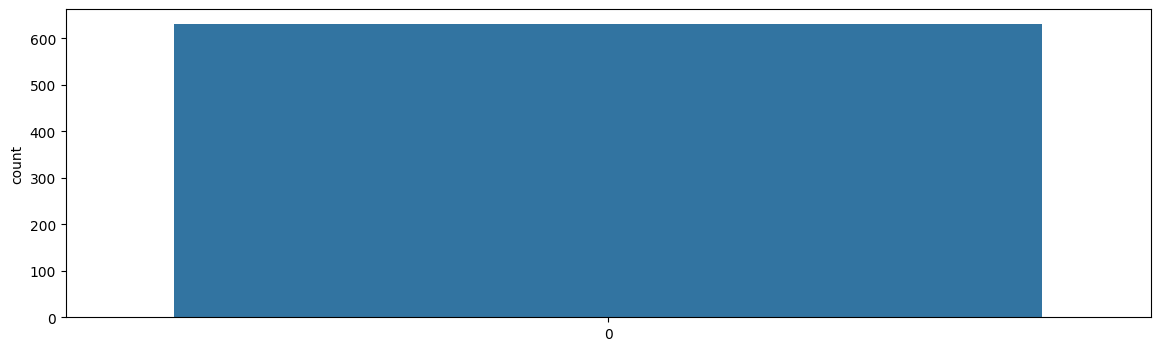

In [37]:
plt.figure(figsize=(14,4))
sns.countplot(loan_df_train['Loan_Status'])
plt.show()

# **Data Distributions and Outliers Detection**

Boxplot: Boxplot is a perfect way to identify the data distribution and outliers detection. It is very simple to understand. Anything outside two vertical bars is called an outlier (Outliers are the values that differ from most of the data values). The starting and end points of the blue box are the 25th and 75th quadrants. A line in the blue box represents the median of the dataset values.

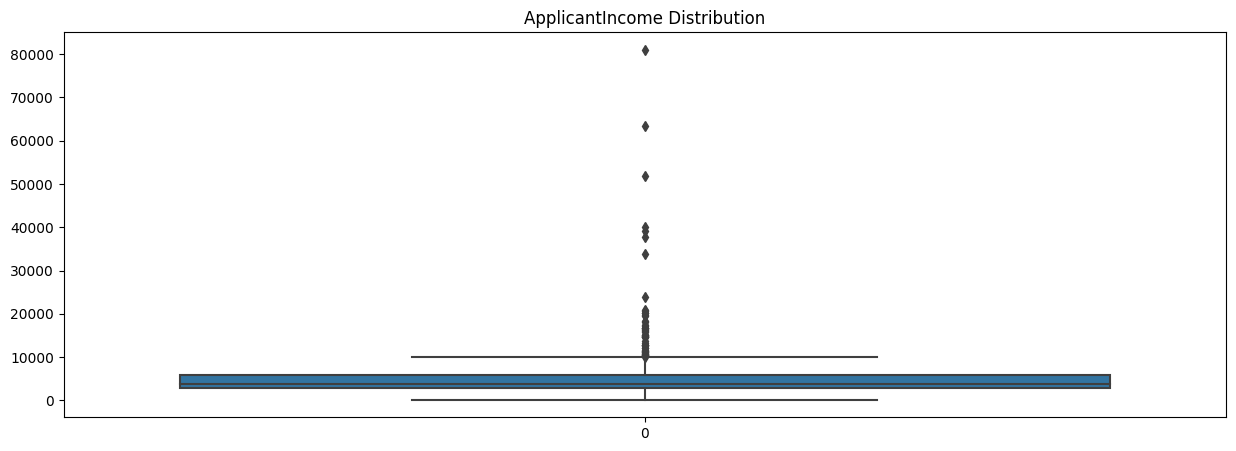

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(loan_df_train['ApplicantIncome'])
plt.title('ApplicantIncome Distribution')
plt.show()

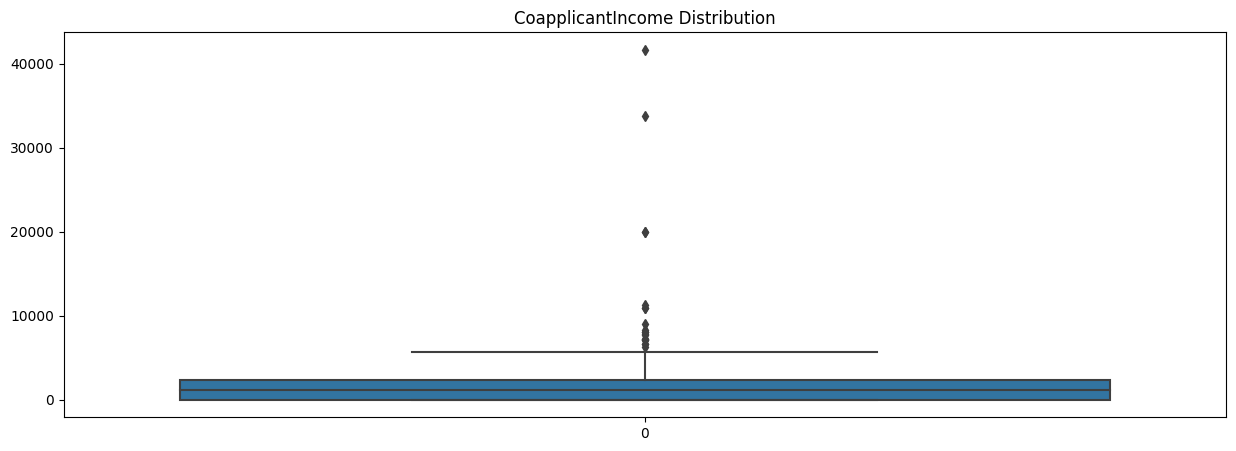

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(loan_df_train['CoapplicantIncome'])
plt.title('CoapplicantIncome Distribution')
plt.show()

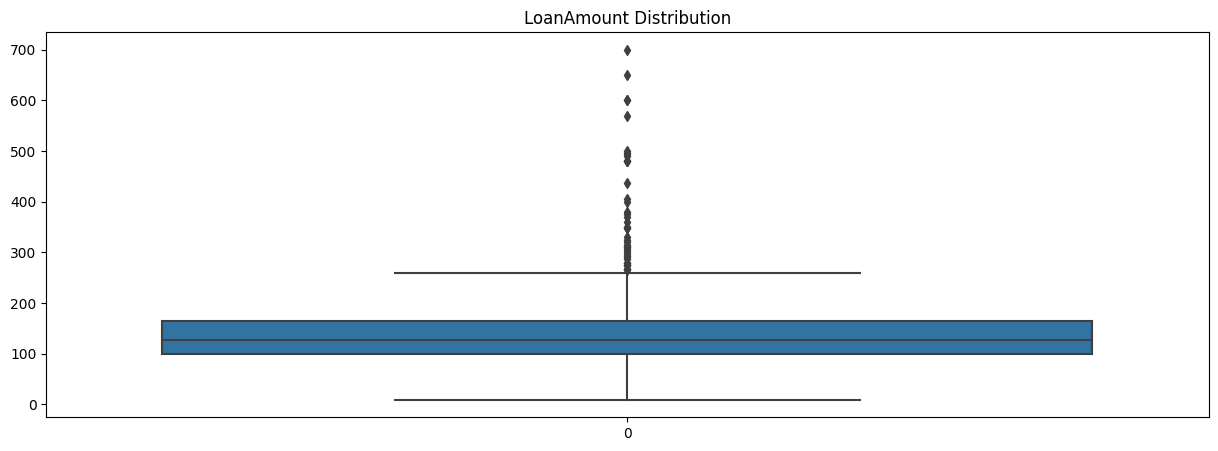

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(loan_df_train['LoanAmount'])
plt.title('LoanAmount Distribution')
plt.show()

# **Outliers Removal and Data Normalization**

As there are most of outliers to we need to remove them by putting all the values under one scale. This is called data scalling.

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

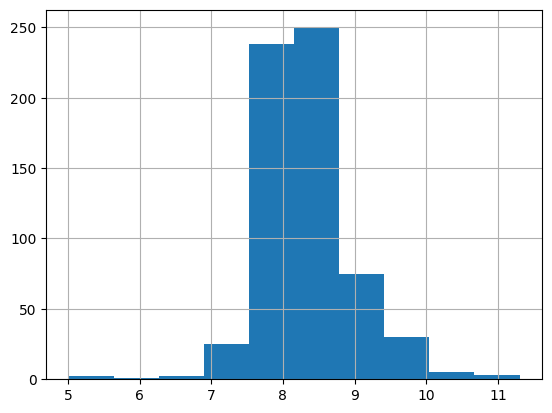

In [41]:
loan_df_train['ApplicantIncome']=np.log(loan_df_train['ApplicantIncome'])
loan_df_test['ApplicantIncome']=np.log(loan_df_test['ApplicantIncome'])
loan_df_train['ApplicantIncome'].hist()

<AxesSubplot: >

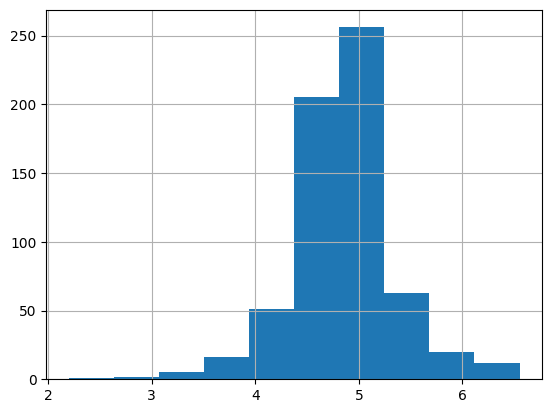

In [42]:
loan_df_train['LoanAmount']=np.log(loan_df_train['LoanAmount'])
loan_df_test['LoanAmount']=np.log(loan_df_test['LoanAmount'])
loan_df_train['LoanAmount'].hist()

In [43]:
loan_df_train['Loan_Amount_Term']=np.log(loan_df_train['Loan_Amount_Term'])
loan_df_test['Loan_Amount_Term']=np.log(loan_df_test['Loan_Amount_Term'])

Data is now normally distributed

# **Categorical Data Encoding**

Our computer can work only with numbers. But our data contain text(categorical) data. Encoding is a method of converting categorical data into numbers. 

In [44]:
#spliting dependent and independent features of the training data
X_train=loan_df_train.drop('Loan_Status',axis=1)
y_train=loan_df_train['Loan_Status']

In [45]:
#removing unnessary features of the test data
X_test=loan_df_test.drop('Loan_ID',axis=1)

In [46]:
#test dataset contains some infinite and too large values so that we need to remove them
X_test = X_test[np.isfinite(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]).all(1)]

In [47]:
#separating numerical and categorical features of the training data
X_train_cat_feat=X_train[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']]
X_train_num_feat=X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]

In [48]:
#separating numerical and categorical features of the testing data
X_test_cat_feat=X_test[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']]
X_test_num_feat=X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]

### **Categorical Data Encoding with OneHotEncoder**

In [49]:
from sklearn.preprocessing import OneHotEncoder #python package for data encoding

In [50]:
encoder = OneHotEncoder(sparse=False)   #initialization of OneHotEncoder

In [51]:
#converting categorical feature of treaining data into numbers
X_train_onehot = encoder.fit_transform(X_train_cat_feat)   

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
#converting categorical feature of testing data into numbers
X_test_onehot = encoder.transform(X_test_cat_feat)

In [53]:
X_train = np.hstack([X_train_onehot, X_train_num_feat])

In [54]:
X_test=np.hstack([X_test_onehot,X_test_num_feat])

# **Model Building**

In [55]:
# Importing Model
from sklearn.linear_model import LogisticRegression

In [56]:
lg=LogisticRegression() #model initialization

In [57]:
lg.fit(X_train,y_train)  #model training

C:\Users\Awais Nayyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Model Testing on the Test Data**

In [58]:
lg.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [59]:
#1 for eligible for a loan and 0 for not eligible for a loan

# **Model Cross Validation Score on Training Data**

In [60]:
#python packages for cross validation score
from sklearn.model_selection import KFold, cross_val_score

In [61]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True) #n_splits->number of splits of training data

In [62]:
scores = cross_val_score(lg, X_train, y_train, cv=cv, n_jobs=-1)

In [63]:
scores

array([0.81102362, 0.76190476, 0.80952381, 0.84920635, 0.82539683])